In [1]:
from skimage import color, io, measure, img_as_ubyte, exposure
from skimage.measure import profile_line
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt
import numpy as np
import pydicom as dicom

In [125]:
# Directory containing data and images
in_dir = "data/"

# X-ray image
im_name = "metacarpals.png"

# Read the image.
# Here the directory and the image name is concatenated
# by "+" to give the full path to the image.
im_org = io.imread(in_dir + im_name)

In [3]:
print(im_org.shape)

(512, 512)


In [4]:
print(im_org.dtype)

uint8


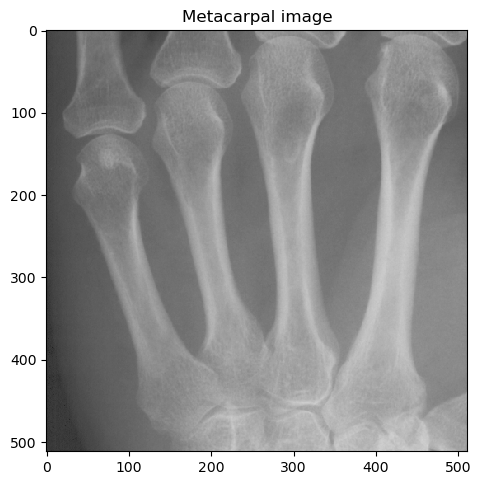

In [5]:
io.imshow(im_org)
plt.title('Metacarpal image')
io.show()

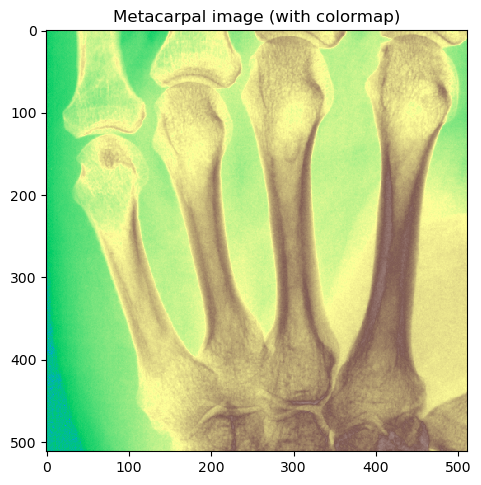

In [6]:
io.imshow(im_org, cmap="terrain")
plt.title('Metacarpal image (with colormap)')
io.show()

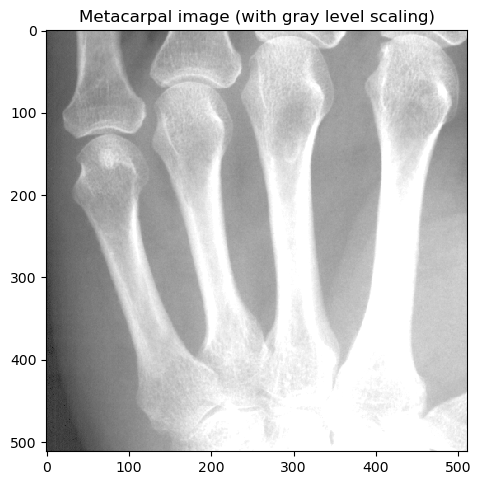

In [7]:
io.imshow(im_org, vmin=20, vmax=170)
plt.title('Metacarpal image (with gray level scaling)')
io.show()

In [8]:
contrast = exposure.rescale_intensity(im_org)

In [14]:
im_org.min(), im_org.max(),

(32, 208)

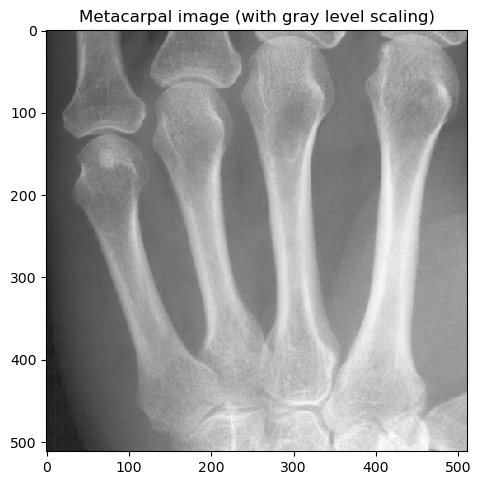

In [16]:
io.imshow(im_org, vmin=im_org.min(), vmax=im_org.max())
plt.title('Metacarpal image (with gray level scaling)')
io.show()

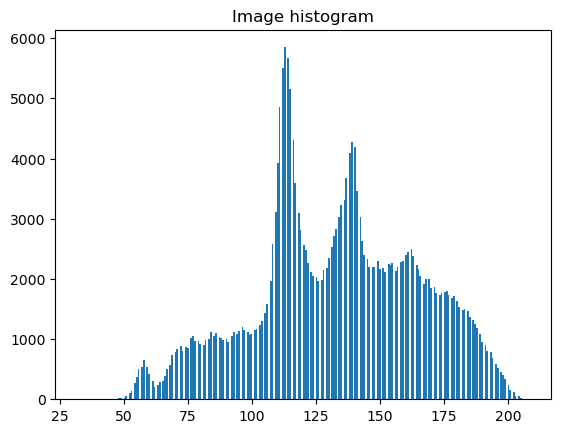

In [17]:
plt.hist(im_org.ravel(), bins=256)
plt.title('Image histogram')
io.show()

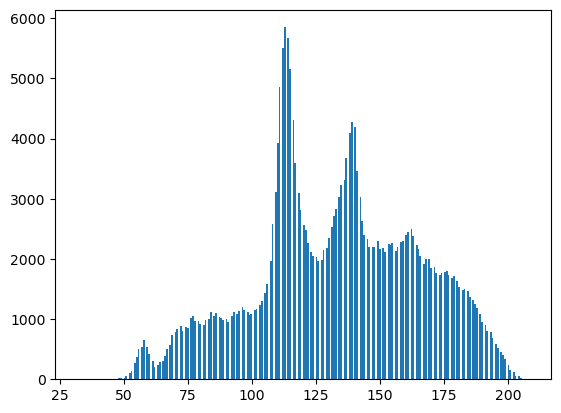

In [18]:
h = plt.hist(im_org.ravel(), bins=256)

In [19]:
bin_no = 100
count = h[0][bin_no]
print(f"There are {count} pixel values in bin {bin_no}")

There are 1147.0 pixel values in bin 100


In [20]:
bin_left = h[1][bin_no]
bin_right = h[1][bin_no + 1]
print(f"Bin edges: {bin_left} to {bin_right}")

Bin edges: 100.75 to 101.4375


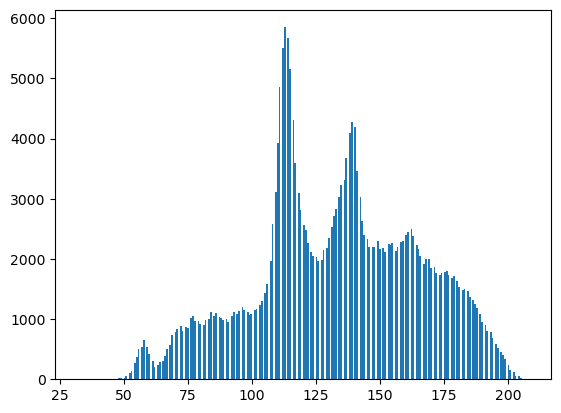

In [21]:
y, x, _ = plt.hist(im_org.ravel(), bins=256)

In [35]:
np.argmax(y)

117

In [36]:
r = 100
c = 50
im_val = im_org[r, c]
print(f"The pixel value at (r,c) = ({r}, {c}) is: {im_val}")

The pixel value at (r,c) = (100, 50) is: 108


In [37]:
im_org[110,90]

120

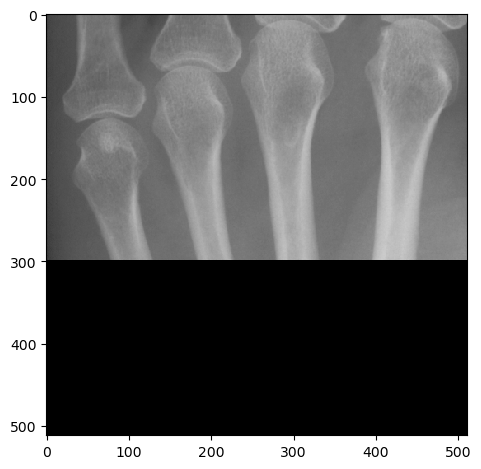

In [51]:
im_new[30:] = 0
io.imshow(im_new)
io.show()

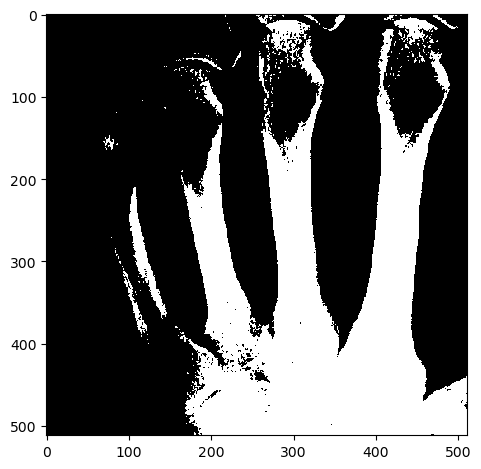

In [55]:
mask = im_org > 150
io.imshow(mask)
io.show()

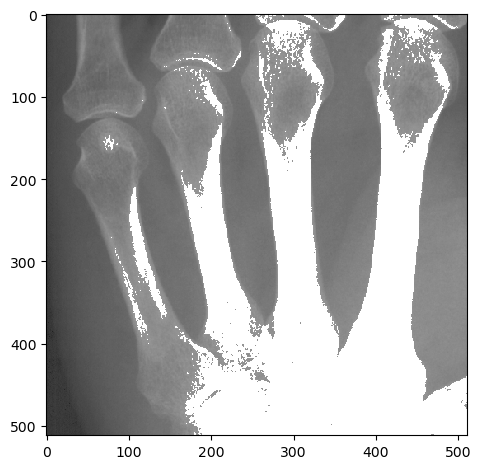

In [56]:
im_org[mask] = 255
io.imshow(im_org)
io.show()

In [86]:
im2_org = io.imread(in_dir + "ardeche.jpg")

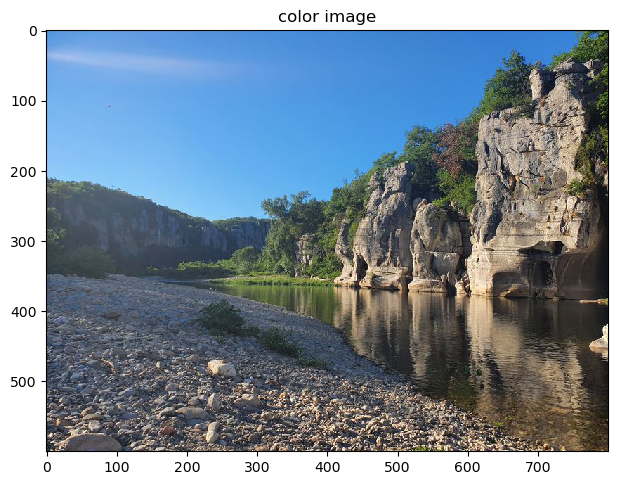

In [91]:
io.imshow(im2_org)
plt.title('color image')
io.show()

In [62]:
print(im2_org.shape)

(600, 800, 3)


In [89]:
print(im2_org.dtype)
im2_new = im2_org

uint8


In [90]:
r = 110
c = 90
im2_new[r, c] = [255, 0, 0]

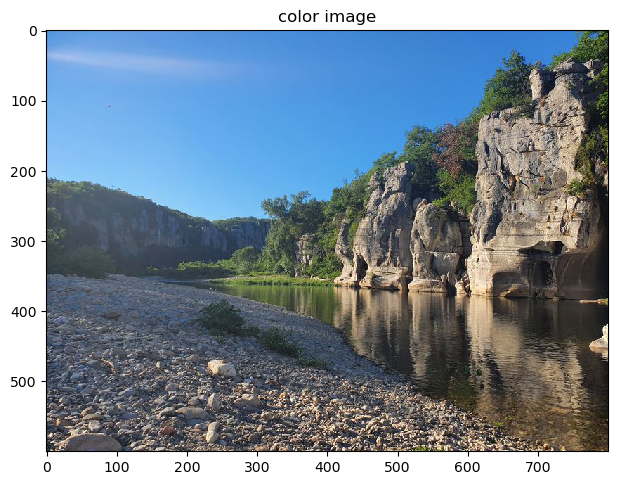

In [88]:
io.imshow(im2_new)
plt.title('color image')
io.show()

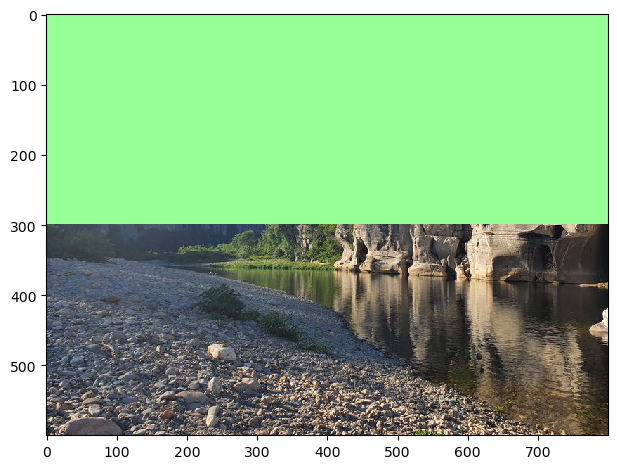

In [100]:
r = im2_org.shape[0]//2
im2_new[:r] = 150,255,150
io.imshow(im2_new)
io.show()

In [102]:
im3_org = io.imread(in_dir + "hardware1.jpg")

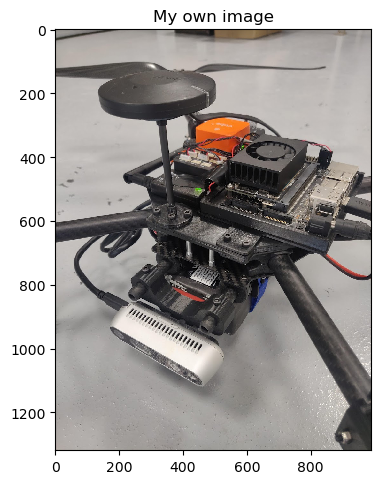

In [103]:
io.imshow(im3_org)
plt.title('My own image')
io.show()

In [106]:
im3_org.shape

(1319, 989, 3)

In [107]:
image_rescaled = rescale(im3_org, 0.25, anti_aliasing=True,
                         channel_axis=2)

In [108]:
image_rescaled.dtype

dtype('float64')

In [111]:
r = 100
c = 50
im_val = image_rescaled[r, c]
print(f"The pixel value at (r,c) = ({r}, {c}) is: {im_val}")

The pixel value at (r,c) = (100, 50) is: [0.69379649 0.67811033 0.6663454 ]


In [113]:
image_resized = resize(im3_org, (im3_org.shape[0] // 4,
                       im3_org.shape[1] // 6),
                       anti_aliasing=True)

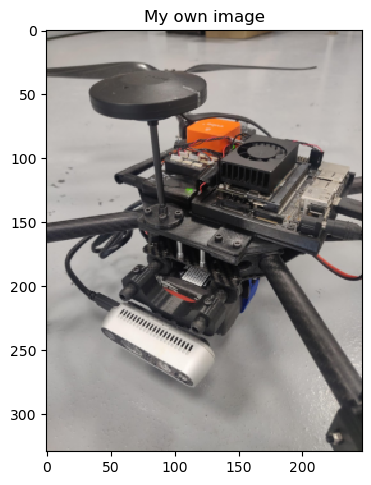

In [115]:
io.imshow(image_rescaled)
plt.title('My own image')
io.show()

In [118]:
scaling_factor = im3_org.shape[1]/400
image_resized = resize(im3_org, (im3_org.shape[0] // scaling_factor,
                       400),
                       anti_aliasing=True)

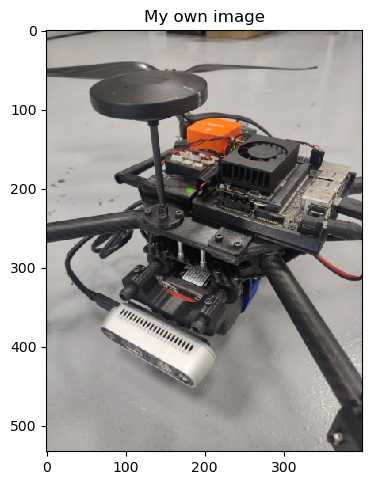

In [119]:
io.imshow(image_resized)
plt.title('My own image')
io.show()

In [122]:
im3_gray = color.rgb2gray(im3_org)
im3_byte = img_as_ubyte(im3_gray)

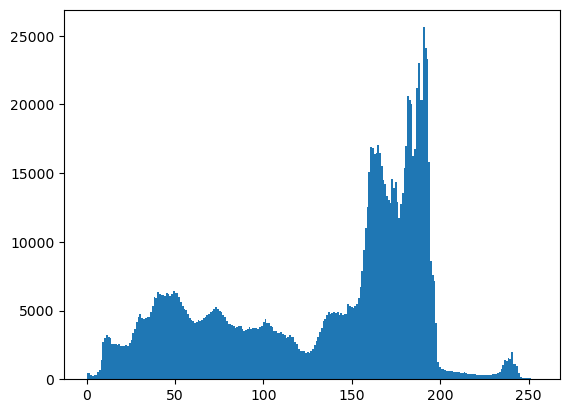

In [123]:
h = plt.hist(im3_byte.ravel(), bins=256)

In [165]:
im_org = io.imread(in_dir + "DTUSign1.jpg")

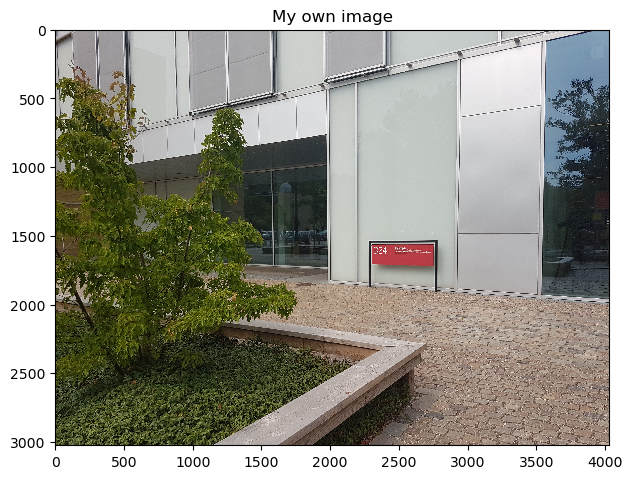

In [137]:
io.imshow(im_org)
plt.title('My own image')
io.show()

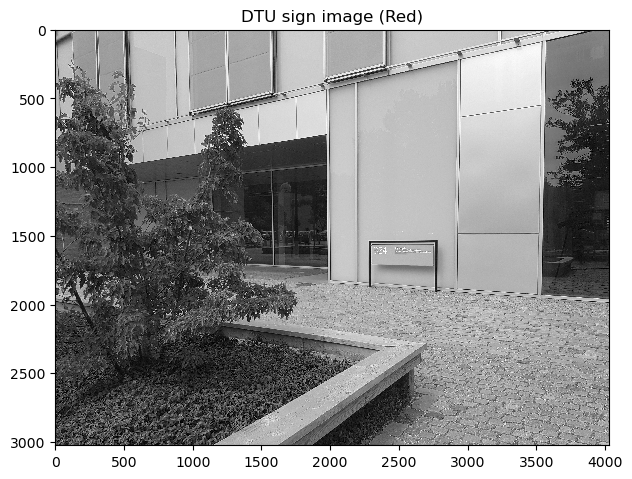

In [153]:
r_comp = im_org[:, :, 0]
io.imshow(r_comp)
plt.title('DTU sign image (Red)')
io.show()

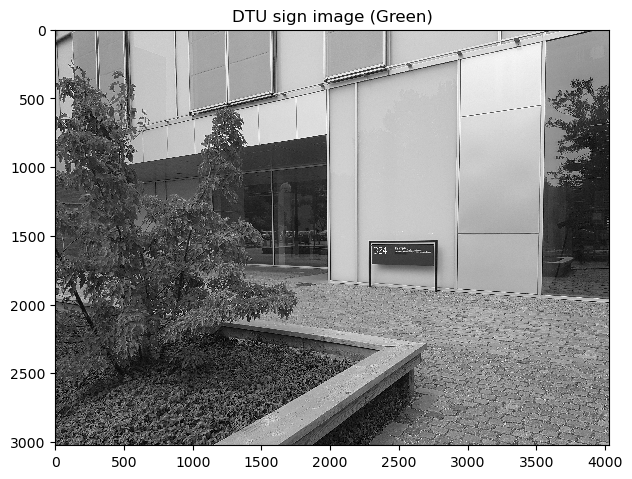

In [160]:
g_comp = im_org[ :, :, 1]
io.imshow(g_comp)
plt.title('DTU sign image (Green)')
io.show()

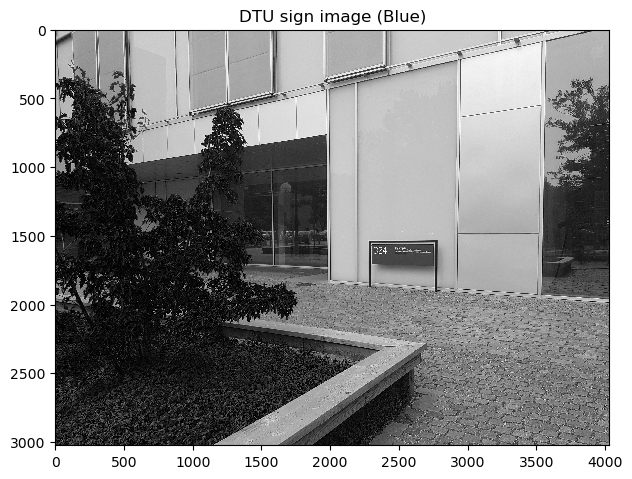

In [161]:
b_comp = im_org[ :, :, 2]
io.imshow(b_comp)
plt.title('DTU sign image (Blue)')
io.show()

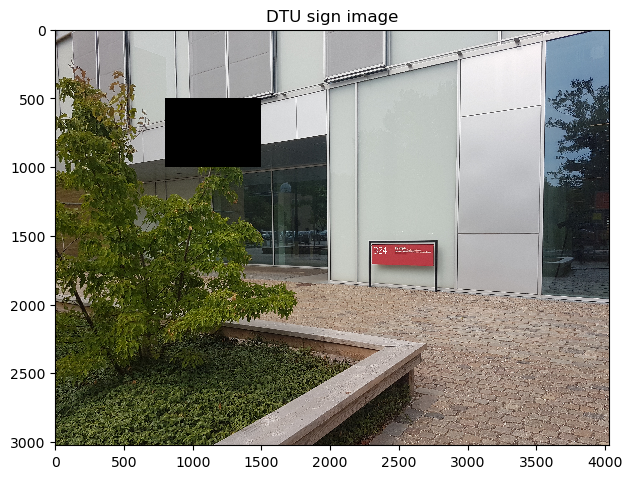

In [167]:
im_org[500:1000, 800:1500, :] = 0
io.imshow(im_org)
plt.title('DTU sign image')
io.show()

In [170]:
io.imsave("data/DTUSign1-marked.jpg", im_org)

In [171]:
im_org = io.imread(in_dir + "DTUSign1.jpg")

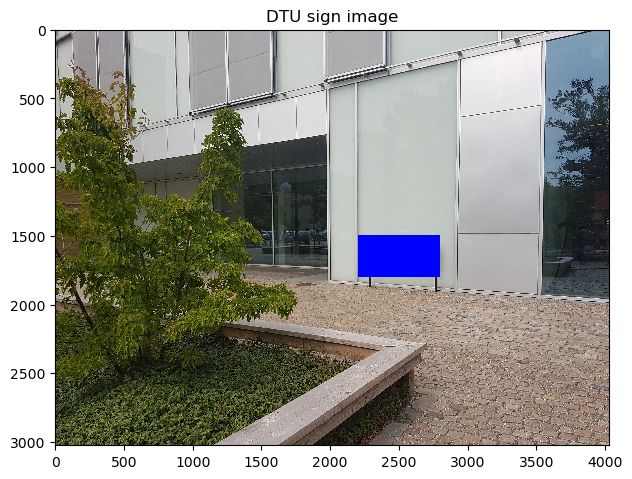

In [172]:
im_org[1500:1800, 2200:2800, :] = (0,0,255)
io.imshow(im_org)
plt.title('DTU sign image')
io.show()

In [173]:
io.imsave("data/DTUSign1-blue.png", im_org)

In [174]:
# X-ray image
im_name = "metacarpals.png"

# Read the image.
# Here the directory and the image name is concatenated
# by "+" to give the full path to the image.
im_org = io.imread(in_dir + im_name)

In [179]:
img_blue = color.gray2rgb(im_org)
img_blue[:,:,0] = 0
img_blue[:,:,1] = 0

C:\Users\Christian\anaconda3\envs\course02502\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


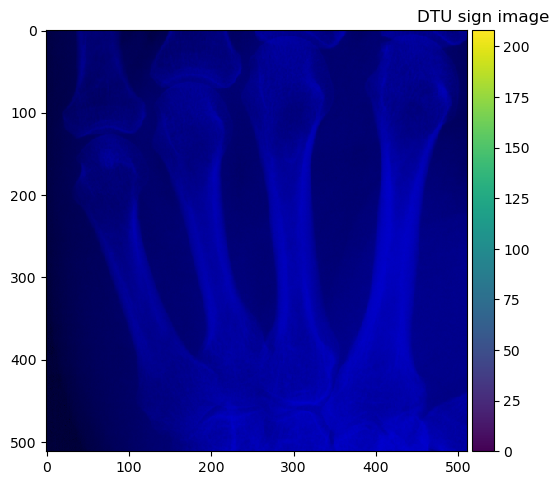

In [180]:
io.imshow(img_blue)
plt.title('DTU sign image')
io.show()

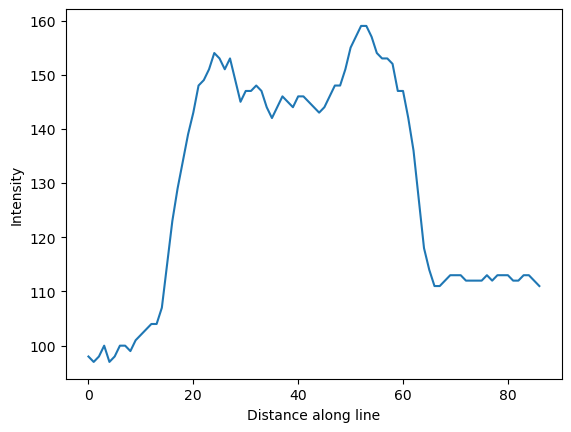

In [181]:
p = profile_line(im_org, (342, 77), (320, 160))
plt.plot(p)
plt.ylabel('Intensity')
plt.xlabel('Distance along line')
plt.show()

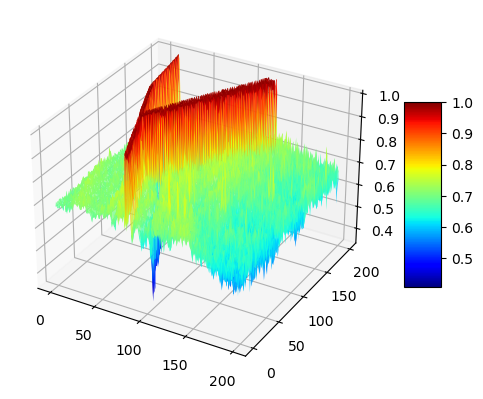

In [182]:
in_dir = "data/"
im_name = "road.png"
im_org = io.imread(in_dir + im_name)
im_gray = color.rgb2gray(im_org)
ll = 200
im_crop = im_gray[40:40 + ll, 150:150 + ll]
xx, yy = np.mgrid[0:im_crop.shape[0], 0:im_crop.shape[1]]
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(xx, yy, im_crop, rstride=1, cstride=1, cmap=plt.cm.jet,
                       linewidth=0)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [183]:
in_dir = "data/"
im_name = "1-442.dcm"
ds = dicom.dcmread(in_dir + im_name)
print(ds)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 174
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 61.7.148187188172271071649499494197343400503
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.34'
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['DERIVED', 'SECONDARY']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 61.7.148187188172271071649499494197343400503
(0008, 0020) Study Date                          DA: '20140914'
(0008, 0030) Study Time                          TM: ''
(0008, 0050) Accession N

In [185]:
im = ds.pixel_array

In [186]:
im.shape

(512, 512)

In [189]:
im.dtype

dtype('int16')

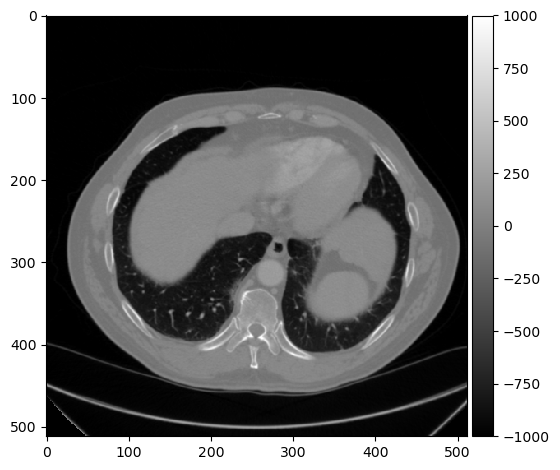

In [190]:
io.imshow(im, vmin=-1000, vmax=1000, cmap='gray')
io.show()

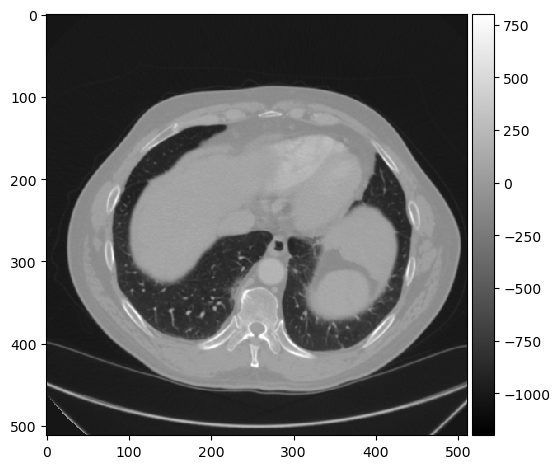

In [194]:
io.imshow(im, vmin=-1200, vmax=800, cmap='gray')
io.show()